In [3]:
from utils import *
import pprint
from collections import Counter,defaultdict
from itertools import chain
import random
import math
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def naive_bayes(pos_train,neg_train,vocab,pos_test,neg_test,alpha=10**-5):
	'''
	Function to perform naive baiyes using standard equation.
	pos_train - positive instances in training set,
	neg_train - negative instances in training set,
	vocab - vocab
	pos_test - positive instances in test set,
	neg_test - negative incstances in test set,
	alpha - alpha value for laplace smoothing,
	returns: tp,fp,fn,tn
	'''

	#get counts of each word in classes
	pos_counts = Counter(chain(*pos_train))
	neg_counts = Counter(chain(*neg_train))
	total_pos = sum(pos_counts[key] for key in pos_counts.keys())
	total_neg = sum(neg_counts[key] for key in neg_counts.keys())

	num_docs = len(pos_train) + len(neg_train)
	prop_pos = len(pos_train)/num_docs
	prop_neg = len(neg_train)/num_docs
	
	#calculate true pos, false pos, false neg, true neg for standard
	tp,fp,fn,tn= [0]*4

	for doc in pos_test:
		is_pos = prop_pos
		is_neg = prop_neg

		for word in doc:
			prob_word_pos = (pos_counts[word] + alpha)/(total_pos + alpha*len(vocab))
			prob_word_neg = (neg_counts[word] + alpha)/(total_neg + alpha*len(vocab))
			is_pos *= prob_word_pos
			is_neg *= prob_word_neg

		if is_pos > is_neg:
			tp += 1
		elif is_neg > is_pos:
			fn += 1
		#if probabilities are equal, flip a coin
		else:
			if random.random() > 0.5:
				tp += 1
			else:
				fn += 1

	for doc in neg_test:
		is_pos = prop_pos
		is_neg = prop_neg

		for word in doc:
			prob_word_pos = (pos_counts[word] + alpha)/(total_pos + alpha*len(vocab))
			prob_word_neg = (neg_counts[word] + alpha)/(total_neg + alpha*len(vocab))
			is_pos *= prob_word_pos
			is_neg *= prob_word_neg

		if is_pos > is_neg:
			fp += 1
		elif is_neg > is_pos:
			tn += 1
		#if probabilities are equal, flip a coin
		else:
			if random.random() > 0.5:
				tn += 1
			else:
				fp += 1

	return tp,fp,fn,tn

In [6]:
def naive_bayes_log(pos_train,neg_train,vocab,pos_test,neg_test,alpha=10**-5):
	'''
	Function to perform naive baiyes using log probabilities.
	pos_train - positive instances in training set,
	neg_train - negative instances in training set,
	vocab - vocab
	pos_test - positive instances in test set,
	neg_test - negative incstances in test set,
	alpha - alpha value for laplace smoothing,
	returns: tp_log,fp_log,fn_log,tn_log
	'''

	#get counts of each word in classes
	pos_counts = Counter(chain(*pos_train))
	neg_counts = Counter(chain(*neg_train))
	total_pos = sum(pos_counts[key] for key in pos_counts.keys())
	total_neg = sum(neg_counts[key] for key in neg_counts.keys())

	num_docs = len(pos_train) + len(neg_train)
	prop_pos = len(pos_train)/num_docs
	prop_neg = len(neg_train)/num_docs
	
	#calculate true pos, false pos, false neg, true neg
	tp_log,fp_log,fn_log,tn_log = [0]*4

	for doc in pos_test:
		pos_log = math.log(prop_pos)
		neg_log = math.log(prop_neg)

		for word in doc:
			pos_log += math.log((pos_counts[word] + alpha)/(total_pos + alpha*len(vocab)))
			neg_log += math.log((neg_counts[word] + alpha)/(total_neg + alpha*len(vocab)))

		if pos_log > neg_log:
			tp_log += 1
		elif neg_log > pos_log:
			fn_log += 1
		#if probabilities are equal, flip a coin
		else:
			if random.random() > 0.5:
				tp_log += 1
			else:
				fn_log += 1

	for doc in neg_test:
		pos_log = math.log(prop_pos)
		neg_log = math.log(prop_neg)

		for word in doc:
			prob_word_pos = (pos_counts[word] + alpha)/(total_pos + alpha*len(vocab))
			prob_word_neg = (neg_counts[word] + alpha)/(total_neg + alpha*len(vocab))
			pos_log += math.log(prob_word_pos)
			neg_log += math.log(prob_word_neg)

		if pos_log > neg_log:
			fp_log += 1
		elif neg_log > pos_log:
			tn_log += 1
		#if probabilities are equal, flip a coin
		else:
			if random.random() > 0.5:
				tn_log += 1
			else:
				fp_log += 1

	return tp_log,fp_log,fn_log,tn_log

**Q.1 (18 Points)** First, perform the classification of the
instances in the test set by comparing posterior probabilities, Pr(yi
| Doc), according to Eq. (1), for
both classes. Then, report (i) the accuracy of your model; (ii) its precision; (iii) its recall; and (iv)
the confusion matrix resulting from this experiment. 

>**NOTE: For this question I implemented laplace smoothing with alpha = 1e-5 as to avoid dealing with 0 probabilities**

In [9]:
(pos_train, neg_train, vocab) = load_training_set(0.2, 0.2)
(pos_test,  neg_test)         = load_test_set(0.2, 0.2)
tp,fp,fn,tn = naive_bayes(pos_train,neg_train,vocab,pos_test,neg_test)

print("Number of positive training instances:", len(pos_train))
print("Number of negative training instances:", len(neg_train))
print("Number of positive test instances:", len(pos_test))
print("Number of negative test instances:", len(neg_test))
with open('vocab.txt','w',encoding='utf-8') as f:
    for word in vocab:
        f.write("%s\n" % word)
print("Vocabulary (training set):", len(vocab))
print()
print("Results for Standard Equation")
print(f"Precision: {(tp/(tp+fp))}")
print(f"Recall: {(tp/(tp+fn))}")
print(f"Accuracy: {((tp+tn)/(tp+fp+tn+fn))}")
print("Confusion Matrix: ")
print(f"TP: {tp} FN: {fn}")
print(f"FP: {fp} TN: {tn}")

Number of positive training instances: 2426
Number of negative training instances: 2407
Number of positive test instances: 2498
Number of negative test instances: 2565
Vocabulary (training set): 42195

Results for Standard Equation
Precision: 0.5955480890382192
Recall: 0.567654123298639
Accuracy: 0.5964842978471262
Confusion Matrix: 
TP: 1418 FN: 1080
FP: 963 TN: 1602


Now repeat the same experiment above but classify the instances in the test set by comparing log-probabilities, log(Pr(yi| Doc)), according to Eq. (5), for both classes. Report the same quantities as before. 

In [10]:
tp_log,fp_log,fn_log,tn_log = naive_bayes_log(pos_train,neg_train,vocab,pos_test,neg_test)
print("Results for Log Transform Equation")
print(f"Precision: {(tp_log/(tp_log+fp_log))}")
print(f"Recall: {(tp_log/(tp_log+fn_log))}")
print(f"Accuracy: {((tp_log+tn_log)/(tp_log+fp_log+tn_log+fn_log))}")
print("Confusion Matrix: ")
print(f"TP: {tp_log} FN: {fn_log}")
print(f"FP: {fp_log} TN: {tn_log}")

Results for Log Transform Equation
Precision: 0.7220367278797997
Recall: 0.6925540432345877
Accuracy: 0.7167687142010666
Confusion Matrix: 
TP: 1730 FN: 768
FP: 666 TN: 1899


Discuss whether classifying instances by computing log-probabilities, instead of probabilities, affects the model’s performance. Assuming that this transformation does have an impact on performance, does it affect more strongly the model’s accuracy, precision, or recall? Why do you think that is the case?

>Classifying instances by computing log-probabilities significantly improves the model's performance when compared to the standard probabilities. It has the strongest effect on recall (22% increase), however the effect is almost equally strong for precision (21.14%) and accuracy (20.3%). When comparing the confusion matrices for both, it is shown that computing log-probabilities increases the number of true positives and true negatives by ~20%. The reason for the improved performance is likely due to the fact that computing log-probabilities changes the comparisson to a summation rather than a product. Since I used a low alpha (1e-5), it is likely that documents including words that were not encountered in the training set had extremely low scores resulting in false positives and false negatives.

**Q.2 (18 Points)** In this experiment, you should use 20% of the training set and 20% of the test set; i.e., call the
dataset-loading functions by passing 0.2 as their parameters. You should first report the confusion
matrix, precision, recall, and accuracy of your classifier (when evaluated on the test set) when using
α = 1.

In [31]:
(pos_train, neg_train, vocab) = load_training_set(0.2, 0.2)
(pos_test,  neg_test)         = load_test_set(0.2, 0.2)
tp_log,fp_log,fn_log,tn_log = naive_bayes_log(pos_train,neg_train,vocab,pos_test,neg_test,alpha=1)

print("Number of positive training instances:", len(pos_train))
print("Number of negative training instances:", len(neg_train))
print("Number of positive test instances:", len(pos_test))
print("Number of negative test instances:", len(neg_test))

with open('vocab.txt','w',encoding='utf-8') as f:
    for word in vocab:
        f.write("%s\n" % word)
print("Vocabulary (training set):", len(vocab))
print()

print("Results for Log Transform Equation Using Alpha = 1")
print(f"Precision: {(tp_log/(tp_log+fp_log))}")
print(f"Recall: {(tp_log/(tp_log+fn_log))}")
print(f"Accuracy: {((tp_log+tn_log)/(tp_log+fp_log+tn_log+fn_log))}")
print("Confusion Matrix: ")
print(f"TP: {tp_log} FN: {fn_log}")
print(f"FP: {fp_log} TN: {tn_log}")

Number of positive training instances: 2525
Number of negative training instances: 2504
Number of positive test instances: 2520
Number of negative test instances: 2441
Vocabulary (training set): 42957

Results for Log Transform Equation Using Alpha = 1
Precision: 0.8605683836589698
Recall: 0.7690476190476191
Accuracy: 0.8193912517637573
Confusion Matrix: 
TP: 1938 FN: 582
FP: 314 TN: 2127


Now, vary the value of α from 0.0001 to 1000, by multiplying α with 10 each time. That is, try
values of α equal to 0.0001, 0.001, 0.01, 0.1, 1.0, 100, and 1000. For each value, record the accuracy of
the resulting model when evaluated on the test set.

In [38]:
i = 0.0001
alpha_vals = []
accuracy = []
while i <= 1000:
    tp_log,fp_log,fn_log,tn_log = naive_bayes_log(pos_train,neg_train,vocab,pos_test,neg_test,alpha=i)
    alpha_vals.append(i)
    acc_i = (tp_log+tn_log)/(tp_log+fp_log+tn_log+fn_log)
    accuracy.append(acc_i)
    print(f"Accuracy for Alpha = {i}: {acc_i}")
    i *= 10


Accuracy for Alpha = 0.0001: 0.7266680104817577
Accuracy for Alpha = 0.001: 0.7478330981656924
Accuracy for Alpha = 0.01: 0.7718201975408184
Accuracy for Alpha = 0.1: 0.7943962910703487
Accuracy for Alpha = 1.0: 0.8193912517637573
Accuracy for Alpha = 10.0: 0.8383390445474702
Accuracy for Alpha = 100.0: 0.8322918766377746
Accuracy for Alpha = 1000.0: 0.7851239669421488


Then, create a plot of the model’s accuracy on the
test set (shown on the y-axis) as a function of the value of α (shown on the x-axis). The x-axis should
represent α values and use a log scale.

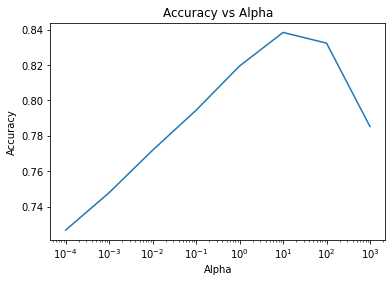

In [34]:
plt.xscale("log")
plt.plot(alpha_vals,accuracy)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha")
plt.show()

Analyze this graph and discuss why do you think the accuracy suffers when α is too high or too low.

>This graph shows that accuracy increases as alpha increases until reaching its maximum accuracy at alpha = 10. For alpha values > 10, accuracy decreases as alpha increases. Alpha values which are too high or too low result in lower accuracy due to the fact that tweaking the value of alpha is equivalent to adding fake occurences of words in the training set. If alpha is too low, then the model will be too biased towards words that occur in the training data causing it to overfit. If alpha is too high, the model may overcompensate by increasing it's percieved frequency of all words; if a word occurs 10 times in the positive training set but 0 times in the negative, adding 10,000 fake instances that word could discount the fact that the word only occured in the positive training set.

**Q.3 (18 Points)** Now you will investigate the impact of the training set size on the performance of the model. The classification of new instances, here, should be done by comparing the posterior log-probabilities, log(Pr(yi | Doc)) according to Eq. (5), for both classes. You should use the value of α that resulted in the highest accuracy according to your experiments in the previous question. In this question, you should use 100% of the training set and 100% of the test set; i.e., call the dataset-loading functions by passing 1.0 as their parameters. Then, report (i) the accuracy of your model; (ii) its precision; (iii) its recall; and (iv) the confusion matrix resulting from this experiment

In [39]:
(pos_train, neg_train, vocab) = load_training_set(1, 1)
(pos_test,  neg_test)         = load_test_set(1, 1)
tp_log,fp_log,fn_log,tn_log = naive_bayes_log(pos_train,neg_train,vocab,pos_test,neg_test,alpha=10)

print("Number of positive training instances:", len(pos_train))
print("Number of negative training instances:", len(neg_train))
print("Number of positive test instances:", len(pos_test))
print("Number of negative test instances:", len(neg_test))

with open('vocab.txt','w',encoding='utf-8') as f:
    for word in vocab:
        f.write("%s\n" % word)
print("Vocabulary (training set):", len(vocab))
print()
print("Results for Log Transform Equation Using Alpha = 10")
print(f"Precision: {(tp_log/(tp_log+fp_log))}")
print(f"Recall: {(tp_log/(tp_log+fn_log))}")
print(f"Accuracy: {((tp_log+tn_log)/(tp_log+fp_log+tn_log+fn_log))}")
print("Confusion Matrix: ")
print(f"TP: {tp_log} FN: {fn_log}")
print(f"FP: {fp_log} TN: {tn_log}")

Number of positive training instances: 12500
Number of negative training instances: 12500
Number of positive test instances: 12500
Number of negative test instances: 12500
Vocabulary (training set): 92603

Results for Log Transform Equation Using Alpha = 10
Precision: 0.8686214442013129
Recall: 0.79392
Accuracy: 0.83692
Confusion Matrix: 
TP: 9924 FN: 2576
FP: 1501 TN: 10999


**Q.4 (18 Points)** Now repeat the experiment above but use only 50% of the training instances; that
is, load the training set by calling load training set(0.5, 0.5). The entire test set should be
used. Report the same quantities as in the previous question. Discuss whether using such a smaller
training set had any impact on the performance of your learned model. Analyze the confusion matrices
(of this question and the previous one) and discuss whether one particular class was more affected by
changing the size of the training set.

In [40]:
(pos_train, neg_train, vocab) = load_training_set(0.5, 0.5)
tp_log,fp_log,fn_log,tn_log = naive_bayes_log(pos_train,neg_train,vocab,pos_test,neg_test,alpha=10)

print("Number of positive training instances:", len(pos_train))
print("Number of negative training instances:", len(neg_train))
print("Number of positive test instances:", len(pos_test))
print("Number of negative test instances:", len(neg_test))

with open('vocab.txt','w',encoding='utf-8') as f:
    for word in vocab:
        f.write("%s\n" % word)
print("Vocabulary (training set):", len(vocab))
print()
print("Results for Log Transform Equation Using Alpha = 10")
print(f"Precision: {(tp_log/(tp_log+fp_log))}")
print(f"Recall: {(tp_log/(tp_log+fn_log))}")
print(f"Accuracy: {((tp_log+tn_log)/(tp_log+fp_log+tn_log+fn_log))}")
print("Confusion Matrix: ")
print(f"TP: {tp_log} FN: {fn_log}")
print(f"FP: {fp_log} TN: {tn_log}")

Number of positive training instances: 6262
Number of negative training instances: 6344
Number of positive test instances: 12500
Number of negative test instances: 12500
Vocabulary (training set): 67067

Results for Log Transform Equation Using Alpha = 10
Precision: 0.8689846760462407
Recall: 0.77576
Accuracy: 0.8294
Confusion Matrix: 
TP: 9697 FN: 2803
FP: 1462 TN: 11038


>Using only 50% of the training instances resulted in worse recall and accuracy while precision was roughly the same. By comparing the confusion matrices, we can see that using 50% of the training data reulted in a higher number of false negatives and true negatives, while yielding a lower amount of true positives and false positives. In this case, using 50% of the training set seemed to incur a bias towards negative reviews. This is likely due to the fact that using 50% of the training instances resulted in 6262 positive training instances and 6344 negative training instances.

**Q.5 (10 Points)** In this application (i.e., accurately classifying movie reviews), would you say that it
is more important to have high accuracy, high precision, or high recall? Justify your opinion

>Since we are analyzing many movie reviews, we are likely trying to guage public opinion of a given movie. In this case, having a high recall is most important as we care about accurately identifying wether a movie has more positive or more negative reviews. If the model has a high recall, then we can assume that the number of documents classified as positive is close to the actual number of positive reviews (given our accuracy and precision is not horrible). With this information we can determine wether or not the majority of reviews favor the movie. That being said, a model could achieve a recall of 1 just by classifying every review as positive. Because of this, it is still important for a model to have high accuracy and precision.

**Q.6 (18 Points)** You should use the value of α that resulted in the highest accuracy according to your experiments in the previous questions. You will now conduct an experiment where you use only 10% of the available positive training instances and that uses 50% of the available negative training instances. That is, use load training set(0.1, 0.5). The entire test set should be used. Show the confusion matrix of your trained model, as well as
its accuracy, precision, and recall. 

In [41]:
(pos_train, neg_train, vocab) = load_training_set(0.1, 0.5)
tp_log,fp_log,fn_log,tn_log = naive_bayes_log(pos_train,neg_train,vocab,pos_test,neg_test,alpha=10)

print("Number of positive training instances:", len(pos_train))
print("Number of negative training instances:", len(neg_train))
print("Number of positive test instances:", len(pos_test))
print("Number of negative test instances:", len(neg_test))

with open('vocab.txt','w',encoding='utf-8') as f:
    for word in vocab:
        f.write("%s\n" % word)
print("Vocabulary (training set):", len(vocab))
print()
print("Results for Unbalanced Training Using Alpha = 10")
print(f"Precision: {(tp_log/(tp_log+fp_log))}")
print(f"Recall: {(tp_log/(tp_log+fn_log))}")
print(f"Accuracy: {((tp_log+tn_log)/(tp_log+fp_log+tn_log+fn_log))}")
print("Confusion Matrix: ")
print(f"TP: {tp_log} FN: {fn_log}")
print(f"FP: {fp_log} TN: {tn_log}")

Number of positive training instances: 1287
Number of negative training instances: 6198
Number of positive test instances: 12500
Number of negative test instances: 12500
Vocabulary (training set): 50530

Results for Unbalanced Training Using Alpha = 10
Precision: 0.8571428571428571
Recall: 0.00048
Accuracy: 0.5002
Confusion Matrix: 
TP: 6 FN: 12494
FP: 1 TN: 12499


Compare this model’s performance to the performance (according to these same metrics) of the model trained in question Q.4—that is, a model that was trained under a balanced dataset. Discuss how training under an unbalanced dataset affected each of these performance metrics.

>The performance of the unbalanced training set is significantly worse than the balanced training set. The unbalanced training set yields a pitifully low recall of almost 0 and extremely low accuracy of 0.5, compared to 0.78 and 0.83 respectively with the balanced training set. Despite this, the unabalanced training set yielded a similar precision to the balanced training set. Looking at the confusion matrix corresponding to the unbalanced training data, we can see that only 7 of the 25,000 documents were classified as positive. This is due to the fact that the negative training set was 5 times larger than the positive training set, causing the model to classify almost every document as negative due to the inflated word frequencies for the negative dataset. Since the model barely classified any instances as positive, we would expect a near 0 recall. An accuracy of 0.5 is also expected since half of the testing documents are in fact negative. Since the model almost exclusively labeled instances as negative, it is not surprising that an accuracy of 0.86 was recorded since the documents labeled as positive must have had to be significantly similar to the positive training and/or dissimilar to the negative training data.